In [6]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
import tf_utils
import time

%matplotlib inline 
np.random.seed(1)

In [7]:
y_hat = tf.constant(36,name="y_hat")            #定义y_hat为固定值36
y = tf.constant(39,name="y")                    #定义y为固定值39

loss = tf.Variable((y-y_hat)**2,name="loss" )   #为损失函数创建一个变量

init = tf.global_variables_initializer()        #运行之后的初始化(ession.run(init))
                                                #损失变量将被初始化并准备计算
with tf.Session() as session:                   #创建一个session并打印输出
    session.run(init)                           #初始化变量
    print(session.run(loss))                    #打印损失值

Instructions for updating:
Colocations handled automatically by placer.
9


In [8]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a,b)

print(c)

Tensor("Mul:0", shape=(), dtype=int32)


In [9]:
sess = tf.Session()

print(sess.run(c))

20


In [10]:
#利用feed_dict来改变x的值

x = tf.placeholder(tf.int64,name="x")
print(sess.run(2 * x,feed_dict={x:3}))
sess.close()

6


In [11]:
def linear_function():
    """
    实现一个线性功能：
        初始化W，类型为tensor的随机变量，维度为(4,3)
        初始化X，类型为tensor的随机变量，维度为(3,1)
        初始化b，类型为tensor的随机变量，维度为(4,1)
    返回：
        result - 运行了session后的结果，运行的是Y = WX + b 

    """

    np.random.seed(1) #指定随机种子

    X = np.random.randn(3,1)
    W = np.random.randn(4,3)
    b = np.random.randn(4,1)

    Y = tf.add(tf.matmul(W,X),b) #tf.matmul是矩阵乘法
    #Y = tf.matmul(W,X) + b #也可以以写成这样子

    #创建一个session并运行它
    sess = tf.Session()
    result = sess.run(Y)

    #session使用完毕，关闭它
    sess.close()

    return result

In [12]:
print("result = " +  str(linear_function()))

result = [[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


In [13]:
def sigmoid(z):
    """
    实现使用sigmoid函数计算z

    参数：
        z - 输入的值，标量或矢量

    返回：
        result - 用sigmoid计算z的值

    """

    #创建一个占位符x，名字叫“x”
    x = tf.placeholder(tf.float32,name="x")

    #计算sigmoid(z)
    sigmoid = tf.sigmoid(x)

    #创建一个会话，使用方法二
    with tf.Session() as sess:
        result = sess.run(sigmoid,feed_dict={x:z})

    return result

In [14]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.9999938


In [15]:
def one_hot_matrix(lables,C):
    """
    创建一个矩阵，其中第i行对应第i个类号，第j列对应第j个训练样本
    所以如果第j个样本对应着第i个标签，那么entry (i,j)将会是1

    参数：
        lables - 标签向量
        C - 分类数

    返回：
        one_hot - 独热矩阵

    """

    #创建一个tf.constant，赋值为C，名字叫C
    C = tf.constant(C,name="C")

    #使用tf.one_hot，注意一下axis
    one_hot_matrix = tf.one_hot(indices=lables , depth=C , axis=0)

    #创建一个session
    sess = tf.Session()

    #运行session
    one_hot = sess.run(one_hot_matrix)

    #关闭session
    sess.close()

    return one_hot

In [16]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels,C=4)
print(str(one_hot))

[[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [17]:
def ones(shape):
    """
    创建一个维度为shape的变量，其值全为1

    参数：
        shape - 你要创建的数组的维度

    返回：
        ones - 只包含1的数组    
    """

    #使用tf.ones()
    ones = tf.ones(shape)

    #创建会话
    sess = tf.Session()

    #运行会话
    ones = sess.run(ones)

    #关闭会话
    sess.close()

    return ones

In [18]:
print ("ones = " + str(ones([3])))

ones = [1. 1. 1.]


In [19]:
X_train_orig , Y_train_orig , X_test_orig , Y_test_orig , classes = tf_utils.load_dataset()

Y = 1


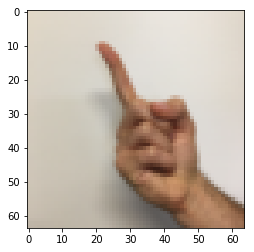

In [20]:
index = 11
plt.imshow(X_train_orig[index])
print("Y = " + str(np.squeeze(Y_train_orig[:,index])))

In [21]:
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0],-1).T #每一列就是一个样本
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0],-1).T

#归一化数据
X_train = X_train_flatten / 255
X_test = X_test_flatten / 255

#转换为独热矩阵
Y_train = tf_utils.convert_to_one_hot(Y_train_orig,6)
Y_test = tf_utils.convert_to_one_hot(Y_test_orig,6)

print("训练集样本数 = " + str(X_train.shape[1]))
print("测试集样本数 = " + str(X_test.shape[1]))
print("X_train.shape: " + str(X_train.shape))
print("Y_train.shape: " + str(Y_train.shape))
print("X_test.shape: " + str(X_test.shape))
print("Y_test.shape: " + str(Y_test.shape))

训练集样本数 = 1080
测试集样本数 = 120
X_train.shape: (12288, 1080)
Y_train.shape: (6, 1080)
X_test.shape: (12288, 120)
Y_test.shape: (6, 120)


In [22]:
def create_placeholders(n_x,n_y):
    """
    为TensorFlow会话创建占位符
    参数：
        n_x - 一个实数，图片向量的大小（64*64*3 = 12288）
        n_y - 一个实数，分类数（从0到5，所以n_y = 6）

    返回：
        X - 一个数据输入的占位符，维度为[n_x, None]，dtype = "float"
        Y - 一个对应输入的标签的占位符，维度为[n_Y,None]，dtype = "float"

    提示：
        使用None，因为它让我们可以灵活处理占位符提供的样本数量。事实上，测试/训练期间的样本数量是不同的。

    """

    X = tf.placeholder(tf.float32, [n_x, None], name="X")
    Y = tf.placeholder(tf.float32, [n_y, None], name="Y")

    return X, Y

In [23]:
X, Y = create_placeholders(12288, 6)
print("X = " + str(X))
print("Y = " + str(Y))

X = Tensor("X_3:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Y_1:0", shape=(6, ?), dtype=float32)


In [24]:
W1 = tf.get_variable("W1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [25]:
def initialize_parameters():
    """
    初始化神经网络的参数，参数的维度如下：
        W1 : [25, 12288]
        b1 : [25, 1]
        W2 : [12, 25]
        b2 : [12, 1]
        W3 : [6, 12]
        b3 : [6, 1]

    返回：
        parameters - 包含了W和b的字典


    """

    tf.set_random_seed(1) #指定随机种子

    W1 = tf.get_variable("W1",[25,12288],initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1",[25,1],initializer=tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12, 25], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2", [12, 1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [6, 12], initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable("b3", [6, 1], initializer = tf.zeros_initializer())

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}

    return parameters

In [26]:
tf.reset_default_graph() #用于清除默认图形堆栈并重置全局默认图形。 

with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


In [27]:
def forward_propagation(X,parameters):
    """
    实现一个模型的前向传播，模型结构为LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX

    参数：
        X - 输入数据的占位符，维度为（输入节点数量，样本数量）
        parameters - 包含了W和b的参数的字典

    返回：
        Z3 - 最后一个LINEAR节点的输出

    """

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']

    Z1 = tf.add(tf.matmul(W1,X),b1)        # Z1 = np.dot(W1, X) + b1
    #Z1 = tf.matmul(W1,X) + b1             #也可以这样写
    A1 = tf.nn.relu(Z1)                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)     # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)     # Z3 = np.dot(W3,Z2) + b3


    return Z3

In [28]:
tf.reset_default_graph() #用于清除默认图形堆栈并重置全局默认图形。 
with tf.Session() as sess:
    X,Y = create_placeholders(12288,6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X,parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(6, ?), dtype=float32)


In [29]:
def compute_cost(Z3,Y):
    """
    计算成本

    参数：
        Z3 - 前向传播的结果
        Y - 标签，一个占位符，和Z3的维度相同

    返回：
        cost - 成本值


    """
    logits = tf.transpose(Z3) #转置
    labels = tf.transpose(Y)  #转置

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits,labels=labels))

    return cost

In [30]:
tf.reset_default_graph()

with tf.Session() as sess:
    X,Y = create_placeholders(12288,6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X,parameters)
    cost = compute_cost(Z3,Y)
    print("cost = " + str(cost))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [32]:
def model(X_train,Y_train,X_test,Y_test,
        learning_rate=0.0001,num_epochs=1500,minibatch_size=32,
        print_cost=True,is_plot=True):
    """
    实现一个三层的TensorFlow神经网络：LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX

    参数：
        X_train - 训练集，维度为（输入大小（输入节点数量） = 12288, 样本数量 = 1080）
        Y_train - 训练集分类数量，维度为（输出大小(输出节点数量) = 6, 样本数量 = 1080）
        X_test - 测试集，维度为（输入大小（输入节点数量） = 12288, 样本数量 = 120）
        Y_test - 测试集分类数量，维度为（输出大小(输出节点数量) = 6, 样本数量 = 120）
        learning_rate - 学习速率
        num_epochs - 整个训练集的遍历次数
        mini_batch_size - 每个小批量数据集的大小
        print_cost - 是否打印成本，每100代打印一次
        is_plot - 是否绘制曲线图

    返回：
        parameters - 学习后的参数

    """
    ops.reset_default_graph()                #能够重新运行模型而不覆盖tf变量
    tf.set_random_seed(1)
    seed = 3
    (n_x , m)  = X_train.shape               #获取输入节点数量和样本数
    n_y = Y_train.shape[0]                   #获取输出节点数量
    costs = []                               #成本集

    #给X和Y创建placeholder
    X,Y = create_placeholders(n_x,n_y)

    #初始化参数
    parameters = initialize_parameters()

    #前向传播
    Z3 = forward_propagation(X,parameters)

    #计算成本
    cost = compute_cost(Z3,Y)

    #反向传播，使用Adam优化
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    #初始化所有的变量
    init = tf.global_variables_initializer()

    #开始会话并计算
    with tf.Session() as sess:
        #初始化
        sess.run(init)

        #正常训练的循环
        for epoch in range(num_epochs):

            epoch_cost = 0  #每代的成本
            num_minibatches = int(m / minibatch_size)    #minibatch的总数量
            seed = seed + 1
            minibatches = tf_utils.random_mini_batches(X_train,Y_train,minibatch_size,seed)

            for minibatch in minibatches:

                #选择一个minibatch
                (minibatch_X,minibatch_Y) = minibatch

                #数据已经准备好了，开始运行session
                _ , minibatch_cost = sess.run([optimizer,cost],feed_dict={X:minibatch_X,Y:minibatch_Y})

                #计算这个minibatch在这一代中所占的误差
                epoch_cost = epoch_cost + minibatch_cost / num_minibatches

            #记录并打印成本
            ## 记录成本
            if epoch % 5 == 0:
                costs.append(epoch_cost)
                #是否打印：
                if print_cost and epoch % 100 == 0:
                        print("epoch = " + str(epoch) + "    epoch_cost = " + str(epoch_cost))

        #是否绘制图谱
        if is_plot:
            plt.plot(np.squeeze(costs))
            plt.ylabel('cost')
            plt.xlabel('iterations (per tens)')
            plt.title("Learning rate =" + str(learning_rate))
            plt.show()

        #保存学习后的参数
        parameters = sess.run(parameters)
        print("参数已经保存到session。")

        #计算当前的预测结果
        correct_prediction = tf.equal(tf.argmax(Z3),tf.argmax(Y))

        #计算准确率
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,"float"))

        print("训练集的准确率：", accuracy.eval({X: X_train, Y: Y_train}))
        print("测试集的准确率:", accuracy.eval({X: X_test, Y: Y_test}))

        return parameters

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


epoch = 0    epoch_cost = 1.8557019305951667
epoch = 100    epoch_cost = 1.0172552123214258
epoch = 200    epoch_cost = 0.7331836846741765
epoch = 300    epoch_cost = 0.5730705983711013
epoch = 400    epoch_cost = 0.46857343568946364
epoch = 500    epoch_cost = 0.38122753211946203
epoch = 600    epoch_cost = 0.31381532911098364
epoch = 700    epoch_cost = 0.25370787219567736
epoch = 800    epoch_cost = 0.20390023426576093
epoch = 900    epoch_cost = 0.16645109472852765
epoch = 1000    epoch_cost = 0.14670434865084564
epoch = 1100    epoch_cost = 0.10727583639549486
epoch = 1200    epoch_cost = 0.08656253496354277
epoch = 1300    epoch_cost = 0.059340415861118934
epoch = 1400    epoch_cost = 0.052287348066315506


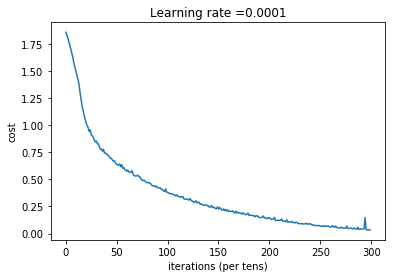

参数已经保存到session。
训练集的准确率： 0.9990741
测试集的准确率: 0.725
CPU的执行时间 = 3270.824515 秒


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [33]:
#开始时间
start_time = time.clock()
#开始训练
parameters = model(X_train, Y_train, X_test, Y_test)
#结束时间
end_time = time.clock()
#计算时差
print("CPU的执行时间 = " + str(end_time - start_time) + " 秒" )